![](https://img.shields.io/badge/PO.DAAC-Contribution-%20?color=grey&labelColor=blue)

> From the PO.DAAC Cookbook, to access the GitHub version of the notebook, follow [this link](https://github.com/podaac/tutorials/blob/master/notebooks/HUC%20Feature%20Translation%20Service%20Examples-updated-20210804.ipynb).

# Search by HUC Example

#### *Authors: Alireza Farahmand, Cassandra Nickles, PO.DAAC*

## Summary
This notebook will geospatially search using the PO.DAAC *HUC Feature Translation Service (FTS)*, previewing (viusualizing) the queried region of interest (the  Upper Tuolumne River Basin in the San Joaquin River Basin in California's Sierra Nevada Mountains), and using FTS results to query NASA data. This is a programmatic approach to using the 'Advanced Search -> River Reach' query in the [Earthdata Search GUI](https://search.earthdata.nasa.gov/search).

## Requirements
### 1. Compute environment 
This tutorial can be run in the following environments:
- **Local compute environment** e.g. laptop, server: this tutorial can be run on your local machine
- **AWS instance running in us-west-2**: NASA Earthdata Cloud data in S3 can be directly accessed via temporary credentials; this access is limited to requests made within the US West (Oregon) (code: `us-west-2`) AWS region.

### 2. Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.

### Learning Objectives
1. use the FTS-HUC API (https://fts.podaac.earthdata.nasa.gov/) to define geographic region of interest (query by partial or exact HUC or HUC region name)
2. visualize query 
3. use coordinates returned by FTS to query Sentinel-1 data, by polygon or bounding box.

**Resources**
USGS Hydrologic unit map to help identifiy region of interest (e.g. HUC value or name) can be found here: https://water.usgs.gov/GIS/regions.html

### Import libraries

In [1]:
import sys
import requests
import json
from shapely.geometry import box, Polygon
import matplotlib.pyplot as plt 
import geopandas as gpd
import numpy as np
import earthaccess

## Search Feature Translation Service for Partial Region Matches

If you are unsure what the corresponding HUC is for your region of interest, you can query the FTS for _partial_ region matches, by setting `EXACT = FALSE`.

In [2]:
# Querying partial matches with region "San Joaquin"
# This "partial" match is anything that BEGINS with the region specified.

REGION = "San Joa"
EXACT = False

# Query Feature Translation Service and parse JSON response
r = requests.get("https://fts.podaac.earthdata.nasa.gov/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that partially matches with region "San Jo"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "time": "5.954 ms.",
    "hits": 3,
    "search on": {
        "parameter": "region",
        "exact": false,
        "polygon_format": "",
        "page_number": 1,
        "page_size": 100
    },
    "results": {
        "San Joaquin": {
            "USGS Polygon": {
                "Object URL": "https://podaac-feature-translation-service.s3-us-west-2.amazonaws.com/180400.zip",
                "Source": "ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/WBD/HU2/Shape/WBD_18_HU2_Shape.zip"
            },
            "Bounding Box": "-121.93679916804501,36.36688239563472,-118.65438684397327,38.757297326299295",
            "Convex Hull Polygon": "-120.63835246068544,36.36688239563472,-120.63808719818587,36.3669077091763,-118.73841884071788,37.07942819140368,-118.67420150956752,37.106490572611676,-118.6735564366519,37.10721677469388,-118.66992847311582,37.11265112260213,-118.65448236168146,37.14116804130782,-118.65438684397327,37.14146941734

## Search Feature Translation Service for Exact HUC Matches

Here we can set a HUC ID, or hydrologic unit code, and use this to query the HUC FTS. By defining the parameter _EXACT = True_, we tell the query to not search for partial matches.

Based on the partial name response in the previous step, we can now do an exact search for San Joaquin River Basin, using its HUC ID (1804).

In [3]:
# Querying exact matches for HUC "1804" = San Joaquin River Basin

HUC = "1804"
EXACT = True

# Query Feature Translation Service and parse JSON response
r = requests.get("https://fts.podaac.earthdata.nasa.gov/huc/{}?exact={}".format(HUC, EXACT))

# Load response from FTS
response = r.json()

# Print only the region name from the query results of the HUC database
print(json.dumps(response["results"]["1804"]["Region Name"], indent = 4))

"San Joaquin"


## Search Feature Translation Service for Exact HUC and Named Region Matches

What if we are interested in the Toulumne River Basin within the San Joaquin main basin? We can search directly for that basin as well. If we already know an exact region name or HUC in USGS's Watershed Boundary Dataset (WBD), we can use this or the name of the basin, or search partially like we did above. Below is an example of searching by exact match using HUC ID (e.g. `18040009`) that could be modified to search  by region name ("Upper Tuolumne").

In [4]:
# Querying exact matches with HUC "18040009" = Upper Tuolumne

HUC = "18040009" #or REGION = "Upper Tuolumne"
EXACT = True

# Query Feature Translation Service and parse JSON response
# If using region, Note the change in endpoint must go from "/huc" to "/region" and the .format() must change from HUC to REGION
r = requests.get("https://fts.podaac.earthdata.nasa.gov/huc/{}?exact={}".format(HUC, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that exactly match HUC "18040009"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "time": "1.659 ms.",
    "hits": 1,
    "search on": {
        "parameter": "HUC",
        "exact": true,
        "polygon_format": "",
        "page_number": 1,
        "page_size": 100
    },
    "results": {
        "18040009": {
            "USGS Polygon": {
                "Object URL": "https://podaac-feature-translation-service.s3-us-west-2.amazonaws.com/18040009.zip",
                "Source": "ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/WBD/HU2/Shape/WBD_18_HU2_Shape.zip"
            },
            "Bounding Box": "-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182",
            "Convex Hull Polygon": "-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.745555179953044,-1

# Visualize the Response from the HUC Feature Translation Service

### Function for Visualization

Below is a function created specifically to visualize the output of the HUC Feature Translation Service. 

In [5]:
def visualize(fts_response):
    
    regions = []
    bounding_boxes = []
    convex_hull_polygons = []
    visvalingam_polygons = []
    for element in fts_response['results']:
        for heading in fts_response['results'][element]:
            if heading == "Bounding Box":
                bounding_boxes.append([float(e) for e in fts_response['results'][element][heading].split(",")])
            elif heading == "Convex Hull Polygon":
                convex_hull_polygons.append([float(e) for e in fts_response['results'][element][heading].split(",")])
            elif heading == "Visvalingam Polygon":
                visvalingam_polygons.append([float(e) for e in fts_response['results'][element][heading].split(",")])
            elif heading == "HUC":
                regions.append("Region Name: " + element + "\n" + "HUC: " + fts_response['results'][element][heading])
            elif heading == "Region Name":
                regions.append("Region Name: " + fts_response['results'][element][heading] + "\n" + "HUC: " + element)
            else:
                continue

    bounding_boxes = [box(e[0], e[1], e[2], e[3]) for e in bounding_boxes]
    convex_hull_polygons = [Polygon(np.asarray(polygon).reshape(-1,2)) for polygon in convex_hull_polygons]
    visvalingam_polygons = [Polygon(np.asarray(polygon).reshape(-1,2)) for polygon in visvalingam_polygons]
    
    for i in range(len(bounding_boxes)):
        ax = gpd.GeoSeries(bounding_boxes[i]).plot(alpha=0.2, cmap='Pastel1', figsize=(10,10))
        gpd.GeoSeries(convex_hull_polygons[i]).plot(ax = ax, cmap='Pastel2')
        gpd.GeoSeries(visvalingam_polygons[i]).plot(alpha=0.5, ax=ax, cmap='viridis')

        plt.title(regions[i])
        plt.show()
            

## Visualization

We can take that response and pass it to the _visualize()_ function created above. The pink polygon is *Bounding Box*, the green is *Convex Hull Polygon* and the purple color is  *Visvalingam Polygon*

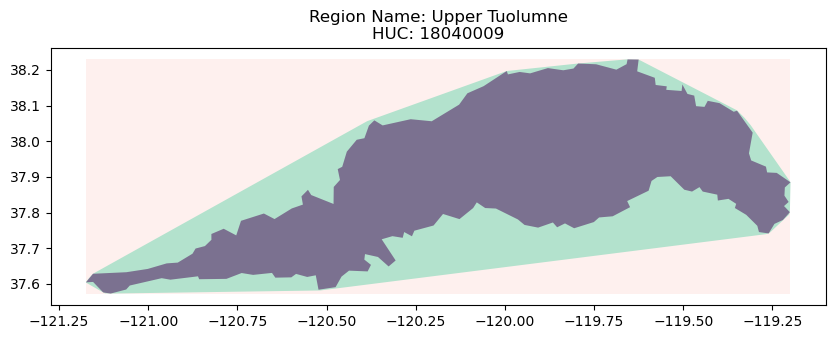

In [6]:
#visualize FTS response
visualize(response)

## Query Data by Bounding Box

We can use results obtained from the FTS to then directly and automatically query on data using the earthaccess Python library. We use the bounding box representing Upper Tuolumne River Basin extracted from the response above, and search for granules available from the SWOT mission, as an example. 

In [7]:
shortname = 'SWOT_L2_HR_Raster_2.0' # SWOT Raster files
HUC = "18040009"

# Obtain bounding box from response
bbox = response['results'][HUC]['Bounding Box']
bbox_vals = []
for val in bbox.split(','): bbox_vals.append(float(val)) #transform string into values

# Query data by bounding box
results = earthaccess.search_data(short_name=shortname, bounding_box=(bbox_vals[0],bbox_vals[1],bbox_vals[2],bbox_vals[3]))

Granules found: 84


## Query Data by Polygon

Instead of querying via bounding box from the FTS response, we can extract the polygon of the region and use this to query.  


In [9]:
shortname = 'SWOT_L2_HR_Raster_2.0' # SWOT Raster files
HUC = "18040009"

#obtain polygon from response
polygon_v = response['results'][HUC]['Visvalingam Polygon']

#transform string into list of values
polygon_vals = []
for val in polygon_v.split(','): polygon_vals.append(float(val)) 
#change list to correct tuple format to input into earthaccess query
it = iter(polygon_vals)
poly = [(x, next(it)) for x in it]

# Query by polygon
results = earthaccess.search_data(short_name=shortname, polygon=poly)

Granules found: 70


## Check with Earthdata Search

To find granules in [Earthdata Search](https://search.earthdata.nasa.gov/search), we need to first search for the collection. You can search for 'SWOT L2 Raster 2.0' in the top left corner to find the Soil Mositure dataset. Earthdata allows you to do an Advanced seach over a HUC region. You can search by HUC ID or HUC region. In our case, let's search for "HUC Region" and "Upper Tuolumne" . 

![Advanced Search](../images/SWOT_HUC_advanced_search.png)

Finally, we can locate the total number of granules from the search which matches with the one we identified.

Also, our search in Earth Data has a unique url with a project ID. This url corresponds to *SWOT Raster* granules within the Upper Tuolumne: 

https://search.earthdata.nasa.gov/search/granules?projectId=3520324655

![Earthdata Granules](../images/SWOT_EDS.png)